# Import Libraries

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Analysis

In [3]:
powerdb = pd.read_csv('Tetuan City power consumption.csv')
powerdb = powerdb.drop(columns=['DateTime'])
powerdb

,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...
52411,7.010,72.4,0.080,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,28958.17490,24692.23688,13512.60504


In [4]:
powerdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52416 non-null  float64
 1   Humidity                  52416 non-null  float64
 2   Wind Speed                52416 non-null  float64
 3   Zone 1 Power Consumption  52416 non-null  float64
 4   Zone 2 Power Consumption  52416 non-null  float64
 5   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


In [5]:
powerdb.describe()

,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360


In [6]:
powerdb.shape

(52416, 6)

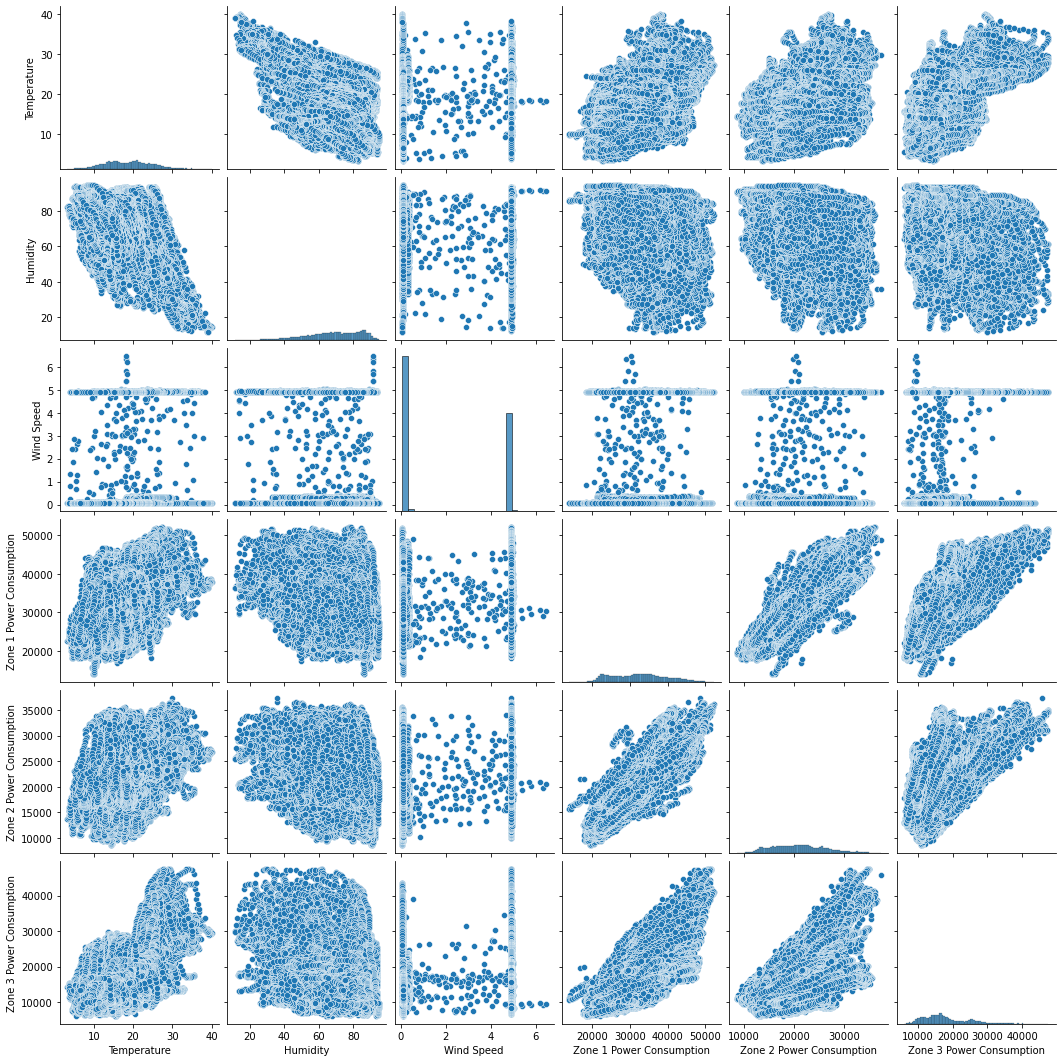

In [7]:
sb.pairplot(powerdb)

**Comments**

The correlation between Power Consumption and Temperature is a positive correlation, meaning that as temperature increases, so does the amount of power that is consumed.  

The correlation between Power Consumption and Humidity is a negative correlation, meaning that as humidity increases, the amount of power that is consumed decreases.  

There is little to no correlation between Power Consumption and Wind Speed.

In [9]:
def clean_db(): # sort out and name the relevant columns from the main database
    global zone1
    global zone2
    global zone3
    zone1 = (powerdb[['Temperature','Humidity','Wind Speed', 'Zone 1 Power Consumption']])
    zone1 = zone1.rename(columns={'Zone 1 Power Consumption':'Power Consumption'})
    zone2 = (powerdb[['Temperature','Humidity','Wind Speed', 'Zone 2 Power Consumption']])
    zone2 = zone2.rename(columns={'Zone 2 Power Consumption':'Power Consumption'})
    zone3 = (powerdb[['Temperature','Humidity','Wind Speed', 'Zone 3 Power Consumption']])
    zone3 = zone3.rename(columns={'Zone 3 Power Consumption':'Power Consumption'})
clean_db()
zone1.head()

,Temperature,Humidity,Wind Speed,Power Consumption
0,6.559,73.8,0.083,34055.69620
1,6.414,74.5,0.083,29814.68354
2,6.313,74.5,0.080,29128.10127
3,6.121,75.0,0.083,28228.86076
4,5.921,75.7,0.081,27335.69620


---

# DataFrame Interface

In [23]:
def update_database(temp,humidity,wind,zone1,zone2,zone3):
    global powerdb
    row_num = len(powerdb)
    new_row = pd.DataFrame([[temp,humidity,wind,zone1,zone2,zone3]], columns=['Temperature','Humidity','Wind Speed','Zone 1 Power Consumption','Zone 2 Power Consumption','Zone 3 Power Consumption'],index = [row_num])
    powerdb = pd.concat((powerdb, new_row))
    clean_db()

In [31]:
update_database(temp=6.555,humidity=74.0,wind=0.082,zone1=28888,zone2=24555,zone3=13333)
powerdb.tail()


,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Zone 3 Power Conumption
52425,6.555,74.0,0.082,28888.0,24555.0,13333.0,NaN
52426,6.555,74.0,0.082,28888.0,24555.0,13333.0,NaN
52427,6.555,74.0,0.082,28888.0,24555.0,13333.0,NaN
52428,6.555,74.0,0.082,28888.0,24555.0,13333.0,NaN
52429,6.555,74.0,0.082,28888.0,24555.0,13333.0,NaN


In [32]:
len(powerdb)

52430

# Model Creation

In [38]:
# A set of functions to manually compute the correlation coefficient and regression line for a given set of data
def standard(series): # Converts a data set to standard units
    return (series - series.mean())/series.std()

def get_coef(standards1, standards2): # Calculates r for two data sets in standard units
    return (standards1*standards2).sum()/(len(standards1)-1)

def get_reg_line(series1, series2): # Calculates slope, intercept, and sample points of a regression line for two data sets
    standards1 = standard(series1)
    standards2 = standard(series2)
    r = get_coef(standards1, standards2)
    slope = r*(series2.std()/series1.std())
    intercept = -slope*series1.mean() + series2.mean()
    reg_line_x = (series1.min(), series1.max())
    reg_line_y = (slope*reg_line_x[0] + intercept, slope*reg_line_x[1] + intercept)
    
    preds = series1*slope + intercept
    errors = preds - series2
    RMSE = ((errors ** 2).sum()/len(errors)) ** 0.5
    return {'slope':slope, 'intercept':intercept, 'x':reg_line_x, 'y':reg_line_y, 'r':r, 'RMSE':RMSE}

In [39]:
# Functions to quickly plot the regression line on a dataset
def plot_relation(series1, series2, ax, first=False): # Plots a single dataset and regression line
    reg_line = get_reg_line(series1, series2)
    ax.plot(reg_line['x'], reg_line['y'], color='red', label=f'r={reg_line["r"]}')
    ax.scatter(series1, series2)
    if (first):
        ax.set_ylabel(series2.name)
    ax.set_title('vs. ' + series1.name)
    ax.set_xlabel(series1.name)
    ax.legend()

def plot_multi_relation(df, X, y, title): # Plots datasets and regression lines for multiple columns in one figure
    fig = plt.figure()
    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
    (ax1, ax2) = gs.subplots(sharey='row')
    fig.suptitle(f'Regression of {df[y].name} {title}')
    plot_relation(df[X[0]], df[y], ax1, True)
    plot_relation(df[X[1]], df[y], ax2)

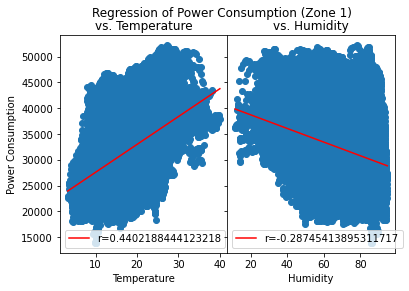

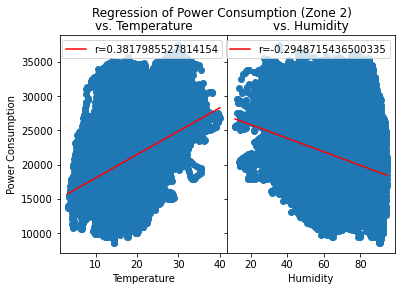

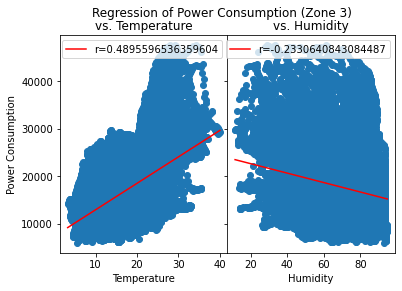

In [40]:
plot_multi_relation(zone1, ['Temperature','Humidity'], 'Power Consumption', '(Zone 1)')
plot_multi_relation(zone2, ['Temperature','Humidity'], 'Power Consumption', '(Zone 2)')
plot_multi_relation(zone3, ['Temperature','Humidity'], 'Power Consumption', '(Zone 3)')

## For all 3 cases, Temperature has the highest correlation coefficient, so it will be used for the model

# Prediction Interface

In [61]:
# Calculate regression lines for each zone based on the chosen independent variable
def calculate_models():
    zone1line = get_reg_line(zone1['Temperature'], zone1['Power Consumption'])
    zone2line = get_reg_line(zone2['Temperature'], zone2['Power Consumption'])
    zone3line = get_reg_line(zone3['Temperature'], zone3['Power Consumption'])
    return [0,zone1line,zone2line,zone3line]

In [62]:
# Return the predicted power consumption using the slope and intercept of the regression line
def predict(zone, temp):
    zonelines = calculate_models()
    slope = zonelines[zone]['slope']
    intercept = zonelines[zone]['intercept']
    return slope*temp + intercept

# Make Predictions

In [63]:
Prediction_Temps = np.array((12.5,21.8,17.9))
zonelines = calculate_models()
preds = pd.DataFrame({
    'Predicted Power Consumption from Temp':Prediction_Temps, 
    'Zone 1':(predict(1,Prediction_Temps)),
    'Zone 2':(predict(2,Prediction_Temps)),
    'Zone 3':(predict(3,Prediction_Temps))
})
preds = preds.set_index('Predicted Power Consumption from Temp').transpose()
preds['Model RMSE'] = [zonelines[1]['RMSE'],zonelines[2]['RMSE'],zonelines[3]['RMSE']]
preds

Predicted Power Consumption from Temp,12.5,21.8,17.9,Model RMSE
Zone 1,28939.204220,33958.866178,31853.846647,6402.350374
Zone 2,18884.644892,22065.219784,20731.430313,4806.103873
Zone 3,14318.144767,19502.109973,17328.189080,5774.347075


According to the error in each model, the prediction for zone 1 has the most uncertainty, while zone 2 has the least